# 查看图片尺寸

In [2]:
%matplotlib inline
from PIL import Image
import os
dl = os.listdir('images')
k = 0 
height,weight = 0,0
mode = ' ' 
for i in dl:
    im = Image.open('images/'+i)
    mode = im.mode
    if k == 0:
        weight,height = im.size[0],im.size[1]
        k = 1
    elif weight != im.size[0] or height!= im.size[1]:
        print(weight,height)
        print(im.size[0],im.size[1])
        print(im)
        break
print('all weight X height: %s X %s' %(weight,height))
print('mode: ',mode)
print('images count:',len(dl))

all weight X height: 224 X 224
mode:  RGB
images count: 27153


## LeNet

In [4]:
import torch
torch.cuda.current_device()
from torch import nn
from d2l import torch as d2l

class Reshape(torch.nn.Module):
    def forward(self,x ):
        return x.view(-1, 3, 224, 224)
    
net = torch.nn.Sequential(
    Reshape(),
    nn.Conv2d(3, 6,kernel_size=5, padding=2),
    nn.Sigmoid(),
    nn.Conv2d(6, 16,kernel_size=5),
    nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Flatten(),
    nn.Linear(16 * 110 * 110, 800), 
    nn.Sigmoid(),
    nn.Linear(800, 400),
    nn.Sigmoid(),
    nn.Linear(400, 176)
    )

对原始模型做了一点小改动，去掉了最后一层的高斯激活。除此之外，这个网络与最初的 LeNet-5 一致。

下面，我们将一个大小为  224×224  的三通道（RGB）图像通过 LeNet。 通过在每一层打印输出的形状，我们可以[检查模型]，以确保其操作与我们期望的 :img_lenet_vert 一致。

In [5]:
X = torch.rand(size=(1, 3, 224, 224),dtype=torch.float32)
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__,'output shape: \t',X.shape)

Reshape output shape: 	 torch.Size([1, 3, 224, 224])
Conv2d output shape: 	 torch.Size([1, 6, 224, 224])
Sigmoid output shape: 	 torch.Size([1, 6, 224, 224])
Conv2d output shape: 	 torch.Size([1, 16, 220, 220])
Sigmoid output shape: 	 torch.Size([1, 16, 220, 220])
AvgPool2d output shape: 	 torch.Size([1, 16, 110, 110])
Flatten output shape: 	 torch.Size([1, 193600])
Linear output shape: 	 torch.Size([1, 800])
Sigmoid output shape: 	 torch.Size([1, 800])
Linear output shape: 	 torch.Size([1, 400])
Sigmoid output shape: 	 torch.Size([1, 400])
Linear output shape: 	 torch.Size([1, 176])


## 模型训练


In [141]:
import numpy as np
import pandas as pd
import shutil

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
val_ratio = 0.2

train_path='train_images/'
val_path='val_images/'
test_path='test_images/'

print('train data shape: ' ,train_data.shape)
print('test data shape: ' ,test_data.shape)
# print(train_data.iloc[:,1].unique())
# print(train_data.iloc[:,1].count())
#将训练集切分成训练集和验证集
label_list = train_data.iloc[:,1].tolist()
label_dict = dict(zip(*np.unique(label_list,return_counts = True)))
# print(label_dict)
if not os.path.exists(train_path):
    os.makedirs(train_path)
if not os.path.exists(val_path):
    os.makedirs(val_path)


image_paths = train_data.iloc[:,0] 
labels = train_data.iloc[:,1] 
count_dict = label_dict.copy()
for k, v in count_dict.items():
    count_dict[k] = 0
# print(count_dict)
# print(label_dict)

#分别将文件复制到train_images和val_images
for a,b in zip(image_paths,labels):
    print(count_dict[b])
    print(label_dict[b]*(1-val_ratio))
    if count_dict[b] <= label_dict[b]*(1-val_ratio):
        sub_train_path = train_path + b
        if not os.path.exists(sub_train_path):
            os.makedirs(sub_train_path)
        print(sub_train_path)
        count_dict[b] += 1
        shutil.copy(a,sub_train_path)
    else:
        sub_val_path = val_path + b
        if not os.path.exists(sub_val_path):
            os.makedirs(sub_val_path)
        print(sub_val_path)
        count_dict[b] += 1
        shutil.copy(a,sub_val_path)


train data shape:  (18353, 2)
test data shape:  (8800, 1)
0
282.40000000000003
train_images/maclura_pomifera
1
282.40000000000003
train_images/maclura_pomifera
2
282.40000000000003
train_images/maclura_pomifera
3
282.40000000000003
train_images/maclura_pomifera
4
282.40000000000003
train_images/maclura_pomifera
5
282.40000000000003
train_images/maclura_pomifera
0
188.0
train_images/ulmus_rubra
0
171.20000000000002
train_images/broussonettia_papyrifera
6
282.40000000000003
train_images/maclura_pomifera
1
171.20000000000002
train_images/broussonettia_papyrifera
7
282.40000000000003
train_images/maclura_pomifera
0
178.4
train_images/prunus_virginiana
8
282.40000000000003
train_images/maclura_pomifera
1
178.4
train_images/prunus_virginiana
2
171.20000000000002
train_images/broussonettia_papyrifera
9
282.40000000000003
train_images/maclura_pomifera
10
282.40000000000003
train_images/maclura_pomifera
3
171.20000000000002
train_images/broussonettia_papyrifera
11
282.40000000000003
train_image

7
151.20000000000002
train_images/ulmus_pumila
26
171.20000000000002
train_images/broussonettia_papyrifera
4
99.2
train_images/koelreuteria_paniculata
1
84.0
train_images/malus_pumila
10
116.0
train_images/juglans_cinerea
28
178.4
train_images/prunus_virginiana
27
171.20000000000002
train_images/broussonettia_papyrifera
21
173.60000000000002
train_images/acer_rubrum
18
188.0
train_images/ulmus_rubra
5
115.2
train_images/cercis_canadensis
22
173.60000000000002
train_images/acer_rubrum
2
138.4
train_images/quercus_montana
6
115.2
train_images/cercis_canadensis
1
124.0
train_images/styrax_japonica
38
282.40000000000003
train_images/maclura_pomifera
1
167.20000000000002
train_images/prunus_sargentii
8
151.20000000000002
train_images/ulmus_pumila
0
78.4
train_images/cornus_mas
13
112.80000000000001
train_images/cryptomeria_japonica
2
140.8
train_images/abies_concolor
0
88.0
train_images/magnolia_virginiana
3
140.8
train_images/abies_concolor
5
99.2
train_images/koelreuteria_paniculata
9
151

train_images/ulmus_pumila
6
88.0
train_images/magnolia_virginiana
4
110.4
train_images/ostrya_virginiana
0
114.4
train_images/ulmus_americana
19
115.2
train_images/cercis_canadensis
2
136.0
train_images/ilex_opaca
27
188.0
train_images/ulmus_rubra
3
92.0
train_images/zelkova_serrata
2
96.0
train_images/tsuga_canadensis
0
84.80000000000001
train_images/pinus_bungeana
35
178.4
train_images/prunus_virginiana
0
85.60000000000001
train_images/cornus_florida
1
114.4
train_images/ulmus_americana
11
167.20000000000002
train_images/prunus_sargentii
37
171.20000000000002
train_images/broussonettia_papyrifera
12
167.20000000000002
train_images/prunus_sargentii
28
188.0
train_images/ulmus_rubra
10
112.80000000000001
train_images/acer_palmatum
0
78.4
train_images/pinus_densiflora
18
101.60000000000001
train_images/tilia_cordata
13
140.8
train_images/abies_concolor
51
282.40000000000003
train_images/maclura_pomifera
4
124.80000000000001
train_images/acer_negundo
20
115.2
train_images/cercis_canadens

2
92.0
train_images/acer_saccharum
2
102.4
train_images/gleditsia_triacanthos
3
95.2
train_images/platanus_occidentalis
63
282.40000000000003
train_images/maclura_pomifera
8
98.4
train_images/catalpa_speciosa
1
78.4
train_images/pinus_rigida
8
84.0
train_images/carya_tomentosa
15
140.8
train_images/abies_concolor
4
86.4
train_images/taxodium_distichum
4
78.4
train_images/quercus_macrocarpa
3
80.0
train_images/populus_deltoides
64
282.40000000000003
train_images/maclura_pomifera
5
86.4
train_images/taxodium_distichum
8
116.0
train_images/chionanthus_virginicus
12
124.0
train_images/styrax_japonica
6
124.80000000000001
train_images/acer_negundo
9
128.8
train_images/liriodendron_tulipifera
2
79.2
train_images/stewartia_pseudocamellia
0
81.60000000000001
train_images/quercus_acutissima
3
92.0
train_images/acer_saccharum
10
128.8
train_images/liriodendron_tulipifera
22
154.4
train_images/ptelea_trifoliata
19
138.4
train_images/quercus_montana
0
79.2
train_images/pinus_virginiana
7
89.600000

train_images/koelreuteria_paniculata
5
84.0
train_images/quercus_stellata
28
115.2
train_images/cercis_canadensis
18
140.8
train_images/abies_concolor
5
66.4
train_images/magnolia_acuminata
7
104.0
train_images/carya_cordiformis
11
116.0
train_images/chionanthus_virginicus
14
88.0
train_images/magnolia_virginiana
8
81.60000000000001
train_images/picea_pungens
19
140.8
train_images/abies_concolor
5
84.0
train_images/quercus_velutina
39
173.60000000000002
train_images/acer_rubrum
4
87.2
train_images/carya_glabra
28
112.80000000000001
train_images/cryptomeria_japonica
2
81.60000000000001
train_images/quercus_acutissima
15
88.0
train_images/magnolia_virginiana
7
62.400000000000006
train_images/morus_alba
48
171.20000000000002
train_images/broussonettia_papyrifera
21
167.20000000000002
train_images/prunus_sargentii
11
136.0
train_images/ilex_opaca
6
84.0
train_images/quercus_velutina
14
112.80000000000001
train_images/acer_palmatum
1
101.60000000000001
train_images/salix_nigra
5
102.4
train

train_images/ulmus_pumila
51
171.20000000000002
train_images/broussonettia_papyrifera
8
102.4
train_images/gleditsia_triacanthos
9
95.2
train_images/platanus_occidentalis
12
104.0
train_images/carya_cordiformis
7
92.0
train_images/zelkova_serrata
81
282.40000000000003
train_images/maclura_pomifera
13
116.0
train_images/catalpa_bignonioides
4
81.60000000000001
train_images/quercus_acutissima
5
71.2
train_images/carya_ovata
6
71.2
train_images/carya_ovata
0
79.2
train_images/ficus_carica
12
78.4
train_images/quercus_macrocarpa
3
63.2
train_images/chionanthus_retusus
13
124.80000000000001
train_images/acer_negundo
48
188.0
train_images/ulmus_rubra
15
122.4
train_images/aesculus_pavi
8
80.80000000000001
train_images/picea_abies
10
80.0
train_images/populus_deltoides
26
138.4
train_images/quercus_montana
8
84.0
train_images/pyrus_calleryana
12
69.60000000000001
train_images/pseudolarix_amabilis
6
84.0
train_images/chamaecyparis_pisifera
30
112.80000000000001
train_images/cryptomeria_japonic

0
64.0
train_images/albizia_julibrissin
2
82.4
train_images/pinus_resinosa
17
122.4
train_images/aesculus_pavi
11
84.80000000000001
train_images/pinus_bungeana
28
167.20000000000002
train_images/prunus_sargentii
6
95.2
train_images/acer_saccharinum
9
84.0
train_images/quercus_stellata
29
167.20000000000002
train_images/prunus_sargentii
30
167.20000000000002
train_images/prunus_sargentii
14
69.60000000000001
train_images/pseudolarix_amabilis
31
167.20000000000002
train_images/prunus_sargentii
2
77.60000000000001
train_images/pinus_taeda
14
102.4
train_images/gleditsia_triacanthos
16
104.0
train_images/carya_cordiformis
32
167.20000000000002
train_images/prunus_sargentii
91
282.40000000000003
train_images/maclura_pomifera
54
178.4
train_images/prunus_virginiana
35
115.2
train_images/cercis_canadensis
12
95.2
train_images/platanus_occidentalis
33
167.20000000000002
train_images/prunus_sargentii
13
80.0
train_images/populus_deltoides
12
84.80000000000001
train_images/pinus_bungeana
14
80.0

train_images/crataegus_viridis
10
80.0
train_images/liquidambar_styraciflua
6
80.80000000000001
train_images/salix_caroliniana
1
78.4
train_images/quercus_nigra
39
115.2
train_images/cercis_canadensis
2
68.0
train_images/larix_decidua
23
140.8
train_images/abies_concolor
4
64.0
train_images/albizia_julibrissin
7
80.0
train_images/salix_matsudana
3
79.2
train_images/ficus_carica
35
112.80000000000001
train_images/cryptomeria_japonica
4
80.80000000000001
train_images/quercus_michauxii
33
154.4
train_images/ptelea_trifoliata
21
84.0
train_images/malus_pumila
2
69.60000000000001
train_images/magnolia_tripetala
11
80.0
train_images/liquidambar_styraciflua
12
87.2
train_images/carya_glabra
23
88.0
train_images/magnolia_virginiana
12
80.0
train_images/liquidambar_styraciflua
6
79.2
train_images/pinus_virginiana
24
140.8
train_images/abies_concolor
14
84.80000000000001
train_images/pinus_bungeana
21
124.80000000000001
train_images/acer_negundo
7
78.4
train_images/nyssa_sylvatica
7
79.2
train_i

train_images/liriodendron_tulipifera
9
79.2
train_images/pinus_virginiana
6
74.4
train_images/abies_nordmanniana
33
138.4
train_images/quercus_montana
32
138.4
train_images/diospyros_virginiana
43
115.2
train_images/cercis_canadensis
34
138.4
train_images/quercus_montana
14
87.2
train_images/carya_glabra
3
68.0
train_images/larix_decidua
8
79.2
train_images/quercus_virginiana
6
74.4
train_images/tilia_americana
8
68.0
train_images/prunus_pensylvanica
4
68.0
train_images/larix_decidua
19
69.60000000000001
train_images/pseudolarix_amabilis
20
69.60000000000001
train_images/pseudolarix_amabilis
14
80.0
train_images/liquidambar_styraciflua
2
68.8
train_images/malus_floribunda
3
75.2
train_images/pinus_peucea
3
60.800000000000004
train_images/acer_platanoides
33
112.80000000000001
train_images/staphylea_trifolia
12
87.2
train_images/quercus_marilandica
38
167.20000000000002
train_images/prunus_sargentii
14
84.0
train_images/pyrus_calleryana
22
89.60000000000001
train_images/magnolia_denudat

11
66.4
train_images/magnolia_acuminata
11
80.80000000000001
train_images/salix_caroliniana
21
78.4
train_images/quercus_macrocarpa
62
171.20000000000002
train_images/broussonettia_papyrifera
23
89.60000000000001
train_images/magnolia_denudata
20
76.0
train_images/populus_tremuloides
60
178.4
train_images/prunus_virginiana
11
81.60000000000001
train_images/picea_pungens
19
88.80000000000001
train_images/carpinus_caroliniana
57
173.60000000000002
train_images/acer_rubrum
21
136.0
train_images/ilex_opaca
3
56.800000000000004
train_images/tilia_europaea
20
96.0
train_images/tsuga_canadensis
26
88.0
train_images/magnolia_virginiana
22
136.0
train_images/ilex_opaca
12
81.60000000000001
train_images/quercus_acutissima
7
79.2
train_images/ficus_carica
14
84.0
train_images/quercus_velutina
25
128.8
train_images/liriodendron_tulipifera
9
76.0
train_images/castanea_dentata
9
79.2
train_images/quercus_virginiana
0
80.80000000000001
train_images/cedrus_libani
12
95.2
train_images/acer_saccharinum


43
167.20000000000002
train_images/prunus_sargentii
23
78.4
train_images/quercus_macrocarpa
6
80.80000000000001
train_images/oxydendrum_arboreum
28
124.80000000000001
train_images/acer_negundo
1
67.2
train_images/prunus_serotina
4
76.0
train_images/pinus_koraiensis
12
76.0
train_images/castanea_dentata
2
62.400000000000006
train_images/crataegus_phaenopyrum
2
66.4
train_images/celtis_tenuifolia
7
74.4
train_images/cedrus_atlantica
2
66.4
train_images/gymnocladus_dioicus
18
84.0
train_images/quercus_stellata
0
56.800000000000004
train_images/fraxinus_pennsylvanica
18
80.0
train_images/liquidambar_styraciflua
2
64.0
train_images/acer_campestre
3
62.400000000000006
train_images/crataegus_phaenopyrum
2
75.2
train_images/pinus_wallichiana
2
68.8
train_images/acer_ginnala
4
62.400000000000006
train_images/crataegus_phaenopyrum
18
79.2
train_images/crataegus_viridis
3
68.8
train_images/malus_coronaria
3
61.6
train_images/ginkgo_biloba
19
62.400000000000006
train_images/morus_alba
20
92.0
trai

13
79.2
train_images/ulmus_parvifolia
11
101.60000000000001
train_images/salix_nigra
13
68.0
train_images/larix_decidua
46
167.20000000000002
train_images/prunus_sargentii
2
56.800000000000004
train_images/fraxinus_pennsylvanica
15
95.2
train_images/acer_saccharinum
3
54.400000000000006
train_images/aesculus_flava
5
83.2
train_images/salix_babylonica
6
68.8
train_images/amelanchier_laevis
3
66.4
train_images/phellodendron_amurense
10
80.80000000000001
train_images/oxydendrum_arboreum
3
64.8
train_images/robinia_pseudo-acacia
0
62.400000000000006
train_images/paulownia_tomentosa
41
151.20000000000002
train_images/ulmus_pumila
8
69.60000000000001
train_images/pinus_sylvestris
27
136.0
train_images/ilex_opaca
31
84.0
train_images/malus_pumila
27
104.0
train_images/carya_cordiformis
6
79.2
train_images/chamaecyparis_thyoides
11
69.60000000000001
train_images/malus_hupehensis
11
69.60000000000001
train_images/magnolia_tripetala
8
61.6
train_images/ginkgo_biloba
24
96.0
train_images/tsuga_ca

train_images/tilia_cordata
4
68.8
train_images/malus_floribunda
39
124.80000000000001
train_images/acer_negundo
29
69.60000000000001
train_images/pseudolarix_amabilis
1
56.800000000000004
train_images/magnolia_grandiflora
37
110.4
train_images/ostrya_virginiana
23
92.0
train_images/acer_saccharum
0
56.800000000000004
train_images/carpinus_betulus
39
140.8
train_images/abies_concolor
1
54.400000000000006
train_images/amelanchier_arborea
8
76.80000000000001
train_images/pinus_echinata
4
68.8
train_images/acer_ginnala
5
67.2
train_images/prunus_serotina
3
62.400000000000006
train_images/paulownia_tomentosa
15
80.80000000000001
train_images/salix_caroliniana
14
80.80000000000001
train_images/magnolia_stellata
50
115.2
train_images/cercis_canadensis
2
54.400000000000006
train_images/amelanchier_arborea
40
140.8
train_images/abies_concolor
26
88.80000000000001
train_images/carpinus_caroliniana
10
75.2
train_images/pinus_peucea
14
82.4
train_images/pinus_resinosa
119
282.40000000000003
train_

train_images/castanea_dentata
19
78.4
train_images/nyssa_sylvatica
18
80.80000000000001
train_images/quercus_michauxii
45
140.8
train_images/abies_concolor
48
138.4
train_images/quercus_montana
8
84.0
train_images/metasequoia_glyptostroboides
6
60.800000000000004
train_images/pinus_strobus
48
138.4
train_images/diospyros_virginiana
24
79.2
train_images/crataegus_viridis
13
79.2
train_images/ficus_carica
69
173.60000000000002
train_images/acer_rubrum
16
66.4
train_images/magnolia_acuminata
33
122.4
train_images/aesculus_pavi
19
80.80000000000001
train_images/quercus_michauxii
21
86.4
train_images/taxodium_distichum
51
115.2
train_images/cercis_canadensis
34
122.4
train_images/aesculus_pavi
24
84.0
train_images/quercus_velutina
75
188.0
train_images/ulmus_rubra
19
87.2
train_images/carya_glabra
30
69.60000000000001
train_images/pseudolarix_amabilis
50
151.20000000000002
train_images/ulmus_pumila
20
87.2
train_images/carya_glabra
2
71.2
train_images/malus_baccata
30
116.0
train_images/chi

train_images/maclura_pomifera
19
80.0
train_images/salix_matsudana
5
62.400000000000006
train_images/cercidiphyllum_japonicum
18
78.4
train_images/pinus_rigida
8
64.8
train_images/robinia_pseudo-acacia
25
71.2
train_images/amelanchier_canadensis
9
66.4
train_images/celtis_tenuifolia
14
70.4
train_images/fagus_grandifolia
20
79.2
train_images/pinus_virginiana
9
66.4
train_images/phellodendron_amurense
25
97.60000000000001
train_images/eucommia_ulmoides
42
114.4
train_images/ulmus_americana
48
140.8
train_images/abies_concolor
30
79.2
train_images/crataegus_viridis
50
138.4
train_images/diospyros_virginiana
28
80.80000000000001
train_images/picea_abies
24
102.4
train_images/gleditsia_triacanthos
18
78.4
train_images/pinus_densiflora
54
115.2
train_images/cercis_canadensis
44
139.20000000000002
train_images/asimina_triloba
15
70.4
train_images/fagus_grandifolia
73
173.60000000000002
train_images/acer_rubrum
20
81.60000000000001
train_images/picea_pungens
45
139.20000000000002
train_images

train_images/ulmus_procera
5
62.400000000000006
train_images/paulownia_tomentosa
10
73.60000000000001
train_images/quercus_shumardii
43
99.2
train_images/koelreuteria_paniculata
42
110.4
train_images/ostrya_virginiana
23
79.2
train_images/pinus_virginiana
76
178.4
train_images/prunus_virginiana
22
80.0
train_images/salix_matsudana
2
58.400000000000006
train_images/prunus_yedoensis
52
167.20000000000002
train_images/prunus_sargentii
7
60.800000000000004
train_images/platanus_acerifolia
21
83.2
train_images/pinus_parviflora
19
82.4
train_images/pinus_resinosa
2
64.0
train_images/halesia_tetraptera
15
79.2
train_images/ficus_carica
12
63.2
train_images/chionanthus_retusus
9
64.8
train_images/robinia_pseudo-acacia
26
97.60000000000001
train_images/eucommia_ulmoides
14
64.0
train_images/albizia_julibrissin
24
92.0
train_images/zelkova_serrata
34
116.0
train_images/chionanthus_virginicus
23
80.0
train_images/salix_matsudana
35
116.0
train_images/chionanthus_virginicus
36
136.0
train_images/i

train_images/amelanchier_arborea
11
64.0
train_images/acer_campestre
14
74.4
train_images/abies_nordmanniana
52
123.2
train_images/quercus_muehlenbergii
6
62.400000000000006
train_images/quercus_coccinea
19
76.0
train_images/pinus_nigra
55
167.20000000000002
train_images/prunus_sargentii
26
80.80000000000001
train_images/prunus_subhirtella
10
68.8
train_images/malus_coronaria
27
77.60000000000001
train_images/pinus_taeda
18
69.60000000000001
train_images/pinus_sylvestris
14
73.60000000000001
train_images/quercus_shumardii
24
79.2
train_images/stewartia_pseudocamellia
29
78.4
train_images/quercus_macrocarpa
48
116.0
train_images/juglans_cinerea
30
78.4
train_images/quercus_macrocarpa
35
88.0
train_images/magnolia_virginiana
37
122.4
train_images/aesculus_pavi
33
79.2
train_images/crataegus_viridis
10
71.2
train_images/malus_baccata
23
78.4
train_images/nyssa_sylvatica
18
69.60000000000001
train_images/malus_hupehensis
44
114.4
train_images/ulmus_americana
41
101.60000000000001
train_ima

train_images/quercus_shumardii
16
66.4
train_images/phellodendron_amurense
15
76.80000000000001
train_images/pinus_echinata
10
79.2
train_images/chamaecyparis_thyoides
54
123.2
train_images/quercus_muehlenbergii
24
86.4
train_images/taxodium_distichum
41
136.0
train_images/ilex_opaca
82
178.4
train_images/prunus_virginiana
78
173.60000000000002
train_images/acer_rubrum
16
71.2
train_images/acer_pensylvanicum
39
128.8
train_images/liriodendron_tulipifera
11
74.4
train_images/pinus_pungens
53
138.4
train_images/quercus_montana
22
82.4
train_images/pinus_resinosa
30
71.2
train_images/amelanchier_canadensis
39
122.4
train_images/aesculus_pavi
80
188.0
train_images/ulmus_rubra
137
282.40000000000003
train_images/maclura_pomifera
10
75.2
train_images/ulmus_glabra
6
62.400000000000006
train_images/paulownia_tomentosa
26
80.0
train_images/salix_matsudana
50
139.20000000000002
train_images/asimina_triloba
13
68.0
train_images/prunus_pensylvanica
28
76.0
train_images/populus_tremuloides
12
66.4


train_images/cladrastis_lutea
62
167.20000000000002
train_images/prunus_sargentii
9
54.400000000000006
train_images/aesculus_flava
53
139.20000000000002
train_images/asimina_triloba
11
69.60000000000001
train_images/betula_alleghaniensis
4
56.800000000000004
train_images/magnolia_grandiflora
13
75.2
train_images/pinus_wallichiana
21
78.4
train_images/pinus_densiflora
17
64.0
train_images/albizia_julibrissin
21
69.60000000000001
train_images/pinus_sylvestris
20
82.4
train_images/pinus_flexilis
63
154.4
train_images/ptelea_trifoliata
32
71.2
train_images/amelanchier_canadensis
31
97.60000000000001
train_images/eucommia_ulmoides
21
82.4
train_images/pinus_flexilis
12
75.2
train_images/ulmus_glabra
1
42.400000000000006
train_images/evodia_daniellii
22
76.0
train_images/pinus_nigra
18
64.0
train_images/albizia_julibrissin
16
61.6
train_images/ginkgo_biloba
8
62.400000000000006
train_images/cercidiphyllum_japonicum
63
167.20000000000002
train_images/prunus_sargentii
32
80.80000000000001
trai

train_images/quercus_marilandica
16
79.2
train_images/chamaecyparis_thyoides
20
80.80000000000001
train_images/oxydendrum_arboreum
18
62.400000000000006
train_images/betula_jacqemontii
25
80.80000000000001
train_images/salix_caroliniana
6
56.800000000000004
train_images/prunus_serrulata
28
80.0
train_images/populus_deltoides
17
79.2
train_images/chamaecyparis_thyoides
15
76.0
train_images/pinus_koraiensis
19
64.8
train_images/robinia_pseudo-acacia
23
80.80000000000001
train_images/magnolia_stellata
23
69.60000000000001
train_images/pinus_sylvestris
11
54.400000000000006
train_images/aesculus_flava
11
68.8
train_images/malus_coronaria
33
92.0
train_images/zelkova_serrata
41
122.4
train_images/aesculus_pavi
25
81.60000000000001
train_images/quercus_acutissima
36
96.0
train_images/tsuga_canadensis
17
54.400000000000006
train_images/amelanchier_arborea
64
154.4
train_images/ptelea_trifoliata
33
80.0
train_images/liquidambar_styraciflua
24
88.80000000000001
train_images/pinus_cembra
24
82.4

train_images/prunus_virginiana
19
83.2
train_images/salix_babylonica
43
116.0
train_images/catalpa_bignonioides
22
64.8
train_images/robinia_pseudo-acacia
11
62.400000000000006
train_images/paulownia_tomentosa
63
138.4
train_images/diospyros_virginiana
33
77.60000000000001
train_images/pinus_taeda
69
167.20000000000002
train_images/prunus_sargentii
13
63.2
train_images/quercus_robur
3
55.2
train_images/sassafras_albidum
43
122.4
train_images/aesculus_pavi
23
69.60000000000001
train_images/magnolia_tripetala
12
66.4
train_images/gymnocladus_dioicus
67
154.4
train_images/ptelea_trifoliata
29
86.4
train_images/taxodium_distichum
64
151.20000000000002
train_images/ulmus_pumila
70
167.20000000000002
train_images/prunus_sargentii
32
80.0
train_images/salix_matsudana
22
80.80000000000001
train_images/oxydendrum_arboreum
17
56.800000000000004
train_images/tilia_europaea
33
80.0
train_images/salix_matsudana
13
64.8
train_images/tilia_tomentosa
21
64.8
train_images/quercus_bicolor
16
82.4
train_

train_images/ulmus_rubra
24
70.4
train_images/crataegus_pruinosa
44
128.8
train_images/liriodendron_tulipifera
54
112.80000000000001
train_images/staphylea_trifolia
7
56.800000000000004
train_images/carpinus_betulus
32
88.80000000000001
train_images/carpinus_caroliniana
29
81.60000000000001
train_images/quercus_acutissima
87
173.60000000000002
train_images/acer_rubrum
34
81.60000000000001
train_images/picea_pungens
33
101.60000000000001
train_images/salix_nigra
38
98.4
train_images/catalpa_speciosa
25
80.80000000000001
train_images/magnolia_stellata
28
84.80000000000001
train_images/pinus_bungeana
9
56.800000000000004
train_images/cornus_kousa
30
85.60000000000001
train_images/cornus_florida
28
79.2
train_images/quercus_virginiana
25
64.8
train_images/robinia_pseudo-acacia
61
139.20000000000002
train_images/asimina_triloba
16
60.0
train_images/morus_rubra
14
62.400000000000006
train_images/paulownia_tomentosa
37
79.2
train_images/crataegus_viridis
45
128.8
train_images/liriodendron_tul

train_images/prunus_sargentii
15
71.2
train_images/malus_baccata
18
78.4
train_images/aesculus_glabra
24
79.2
train_images/chamaecyparis_thyoides
23
61.6
train_images/ginkgo_biloba
34
87.2
train_images/carya_glabra
24
64.8
train_images/quercus_bicolor
11
60.800000000000004
train_images/betula_nigra
18
60.800000000000004
train_images/platanus_acerifolia
24
66.4
train_images/magnolia_acuminata
61
140.8
train_images/abies_concolor
39
92.0
train_images/acer_saccharum
24
78.4
train_images/pinus_densiflora
1
51.2
train_images/acer_griseum
50
99.2
train_images/koelreuteria_paniculata
33
80.80000000000001
train_images/prunus_subhirtella
46
112.80000000000001
train_images/acer_palmatum
35
69.60000000000001
train_images/pseudolarix_amabilis
10
65.60000000000001
train_images/betula_populifolia
147
282.40000000000003
train_images/maclura_pomifera
59
116.0
train_images/juglans_cinerea
95
188.0
train_images/ulmus_rubra
9
56.800000000000004
train_images/quercus_phellos
54
114.4
train_images/ulmus_ame

train_images/eucommia_ulmoides
27
66.4
train_images/magnolia_acuminata
37
81.60000000000001
train_images/picea_pungens
70
115.2
train_images/cercis_canadensis
38
97.60000000000001
train_images/eucommia_ulmoides
27
95.2
train_images/acer_saccharinum
40
98.4
train_images/catalpa_speciosa
32
79.2
train_images/quercus_virginiana
54
136.0
train_images/ilex_opaca
39
97.60000000000001
train_images/eucommia_ulmoides
11
58.400000000000006
train_images/prunus_yedoensis
28
95.2
train_images/acer_saccharinum
50
112.80000000000001
train_images/acer_palmatum
32
84.0
train_images/quercus_stellata
22
84.0
train_images/metasequoia_glyptostroboides
93
171.20000000000002
train_images/broussonettia_papyrifera
36
79.2
train_images/pinus_virginiana
151
282.40000000000003
train_images/maclura_pomifera
16
63.2
train_images/crataegus_laevigata
55
136.0
train_images/ilex_opaca
27
69.60000000000001
train_images/magnolia_tripetala
19
64.8
train_images/tilia_tomentosa
25
79.2
train_images/chamaecyparis_thyoides
71

train_images/cedrus_deodara
22
73.60000000000001
train_images/quercus_shumardii
37
95.2
train_images/platanus_occidentalis
11
56.800000000000004
train_images/acer_pseudoplatanus
20
60.800000000000004
train_images/acer_platanoides
33
76.0
train_images/pinus_nigra
41
80.80000000000001
train_images/picea_abies
38
71.2
train_images/amelanchier_canadensis
58
114.4
train_images/ulmus_americana
24
74.4
train_images/tilia_americana
21
80.80000000000001
train_images/cedrus_libani
25
78.4
train_images/aesculus_glabra
51
116.0
train_images/chionanthus_virginicus
26
70.4
train_images/crataegus_pruinosa
25
84.0
train_images/metasequoia_glyptostroboides
8
46.400000000000006
train_images/cedrus_deodara
59
124.80000000000001
train_images/acer_negundo
33
84.0
train_images/quercus_velutina
58
112.80000000000001
train_images/cryptomeria_japonica
20
62.400000000000006
train_images/crataegus_phaenopyrum
31
69.60000000000001
train_images/pinus_sylvestris
24
56.800000000000004
train_images/tilia_europaea
13


train_images/amelanchier_laevis
20
68.8
train_images/malus_coronaria
27
68.8
train_images/amelanchier_laevis
32
83.2
train_images/salix_babylonica
23
64.0
train_images/albizia_julibrissin
75
151.20000000000002
train_images/ulmus_pumila
34
84.80000000000001
train_images/pinus_bungeana
6
46.400000000000006
train_images/ailanthus_altissima
38
88.80000000000001
train_images/carpinus_caroliniana
38
85.60000000000001
train_images/quercus_alba
71
138.4
train_images/diospyros_virginiana
79
167.20000000000002
train_images/prunus_sargentii
35
80.80000000000001
train_images/quercus_michauxii
11
56.800000000000004
train_images/magnolia_grandiflora
13
60.800000000000004
train_images/betula_nigra
36
80.80000000000001
train_images/prunus_subhirtella
33
79.2
train_images/stewartia_pseudocamellia
27
79.2
train_images/chamaecyparis_thyoides
32
71.2
train_images/acer_pensylvanicum
65
140.8
train_images/abies_concolor
35
85.60000000000001
train_images/cornus_florida
33
84.0
train_images/chamaecyparis_pisi

train_images/pinus_cembra
16
62.400000000000006
train_images/cercidiphyllum_japonicum
41
101.60000000000001
train_images/salix_nigra
17
62.400000000000006
train_images/cercidiphyllum_japonicum
29
68.8
train_images/amelanchier_laevis
53
116.0
train_images/chionanthus_virginicus
15
67.2
train_images/prunus_serotina
66
116.0
train_images/juglans_cinerea
85
167.20000000000002
train_images/prunus_sargentii
15
62.400000000000006
train_images/quercus_coccinea
18
60.800000000000004
train_images/pinus_strobus
41
84.0
train_images/pyrus_calleryana
22
76.0
train_images/pinus_koraiensis
30
70.4
train_images/crataegus_pruinosa
9
56.800000000000004
train_images/prunus_serrulata
40
77.60000000000001
train_images/pinus_taeda
96
171.20000000000002
train_images/broussonettia_papyrifera
69
138.4
train_images/quercus_montana
8
46.400000000000006
train_images/ailanthus_altissima
42
101.60000000000001
train_images/salix_nigra
10
56.800000000000004
train_images/prunus_serrulata
54
116.0
train_images/catalpa_

37
76.0
train_images/pinus_nigra
30
79.2
train_images/chamaecyparis_thyoides
38
84.0
train_images/quercus_velutina
20
66.4
train_images/celtis_tenuifolia
45
102.4
train_images/gleditsia_triacanthos
25
82.4
train_images/cladrastis_lutea
53
128.8
train_images/liriodendron_tulipifera
166
282.40000000000003
train_images/maclura_pomifera
27
71.2
train_images/carya_ovata
34
82.4
train_images/pinus_resinosa
25
73.60000000000001
train_images/quercus_shumardii
30
64.8
train_images/quercus_bicolor
41
80.80000000000001
train_images/quercus_michauxii
8
55.2
train_images/sassafras_albidum
21
64.0
train_images/halesia_tetraptera
29
69.60000000000001
train_images/malus_hupehensis
65
114.4
train_images/ulmus_americana
16
56.800000000000004
train_images/carpinus_betulus
29
79.2
train_images/ficus_carica
39
79.2
train_images/pinus_virginiana
105
178.4
train_images/prunus_virginiana
35
82.4
train_images/pinus_resinosa
22
60.0
train_images/morus_rubra
35
71.2
train_images/acer_pensylvanicum
18
63.2
train_

train_images/pinus_cembra
28
71.2
train_images/carya_ovata
81
151.20000000000002
train_images/ulmus_pumila
40
78.4
train_images/nyssa_sylvatica
49
98.4
train_images/catalpa_speciosa
48
96.0
train_images/tsuga_canadensis
38
74.4
train_images/cedrus_atlantica
42
108.0
train_images/fraxinus_nigra
40
81.60000000000001
train_images/picea_pungens
35
82.4
train_images/pinus_flexilis
28
76.80000000000001
train_images/pinus_echinata
70
116.0
train_images/juglans_cinerea
111
188.0
train_images/ulmus_rubra
22
66.4
train_images/gymnocladus_dioicus
23
68.0
train_images/prunus_pensylvanica
26
73.60000000000001
train_images/quercus_shumardii
20
62.400000000000006
train_images/quercus_coccinea
38
71.2
train_images/acer_pensylvanicum
23
68.8
train_images/malus_coronaria
25
75.2
train_images/pinus_wallichiana
41
81.60000000000001
train_images/picea_pungens
40
79.2
train_images/pinus_virginiana
24
71.2
train_images/malus_baccata
48
102.4
train_images/gleditsia_triacanthos
37
69.60000000000001
train_image

train_images/ginkgo_biloba
55
88.0
train_images/magnolia_virginiana
25
74.4
train_images/pinus_pungens
60
99.2
train_images/koelreuteria_paniculata
27
75.2
train_images/pinus_wallichiana
44
79.2
train_images/crataegus_viridis
38
82.4
train_images/pinus_resinosa
20
58.400000000000006
train_images/prunus_yedoensis
40
81.60000000000001
train_images/quercus_acutissima
44
84.0
train_images/quercus_velutina
42
79.2
train_images/stewartia_pseudocamellia
68
124.0
train_images/styrax_japonica
59
116.0
train_images/chionanthus_virginicus
25
62.400000000000006
train_images/crataegus_phaenopyrum
8
51.2
train_images/acer_griseum
36
62.400000000000006
train_images/morus_alba
31
69.60000000000001
train_images/malus_hupehensis
76
140.8
train_images/abies_concolor
30
75.2
train_images/ulmus_glabra
37
80.80000000000001
train_images/magnolia_stellata
36
70.4
train_images/crataegus_pruinosa
41
69.60000000000001
train_images/pseudolarix_amabilis
50
98.4
train_images/catalpa_speciosa
40
74.4
train_images/ce

train_images/chionanthus_retusus
21
58.400000000000006
train_images/prunus_yedoensis
40
82.4
train_images/pinus_resinosa
41
84.80000000000001
train_images/pinus_bungeana
47
108.0
train_images/fraxinus_nigra
52
92.0
train_images/acer_saccharum
47
84.0
train_images/quercus_velutina
43
81.60000000000001
train_images/picea_pungens
106
171.20000000000002
train_images/broussonettia_papyrifera
24
62.400000000000006
train_images/paulownia_tomentosa
35
79.2
train_images/ficus_carica
50
84.0
train_images/carya_tomentosa
25
57.6
train_images/quercus_cerris
12
56.800000000000004
train_images/prunus_serrulata
26
64.0
train_images/acer_campestre
37
80.0
train_images/populus_deltoides
38
83.2
train_images/salix_babylonica
33
84.0
train_images/metasequoia_glyptostroboides
32
74.4
train_images/abies_nordmanniana
26
64.8
train_images/tilia_tomentosa
20
56.800000000000004
train_images/quercus_palustris
38
86.4
train_images/taxodium_distichum
48
108.0
train_images/fraxinus_nigra
32
70.4
train_images/fagus

train_images/tilia_americana
29
71.2
train_images/malus_baccata
30
65.60000000000001
train_images/betula_populifolia
88
154.4
train_images/ptelea_trifoliata
33
68.8
train_images/amelanchier_laevis
24
66.4
train_images/celtis_tenuifolia
29
64.0
train_images/halesia_tetraptera
23
68.8
train_images/acer_ginnala
80
123.2
train_images/quercus_muehlenbergii
23
67.2
train_images/prunus_serotina
72
112.80000000000001
train_images/acer_palmatum
28
60.0
train_images/morus_rubra
25
78.4
train_images/picea_orientalis
45
79.2
train_images/stewartia_pseudocamellia
28
57.6
train_images/quercus_cerris
48
92.0
train_images/zelkova_serrata
27
63.2
train_images/quercus_imbricaria
101
167.20000000000002
train_images/prunus_sargentii
26
62.400000000000006
train_images/paulownia_tomentosa
47
71.2
train_images/amelanchier_canadensis
53
84.0
train_images/carya_tomentosa
45
95.2
train_images/platanus_occidentalis
60
128.8
train_images/liriodendron_tulipifera
41
95.2
train_images/acer_saccharinum
42
74.4
train_

36
76.80000000000001
train_images/pinus_echinata
51
80.80000000000001
train_images/picea_abies
38
74.4
train_images/tilia_americana
27
78.4
train_images/picea_orientalis
38
78.4
train_images/pinus_densiflora
91
154.4
train_images/ptelea_trifoliata
60
104.0
train_images/carya_cordiformis
44
84.0
train_images/chamaecyparis_pisifera
38
80.80000000000001
train_images/salix_caroliniana
52
79.2
train_images/ulmus_parvifolia
110
173.60000000000002
train_images/acer_rubrum
83
138.4
train_images/quercus_montana
13
46.400000000000006
train_images/ailanthus_altissima
29
56.800000000000004
train_images/fraxinus_pennsylvanica
36
68.8
train_images/amelanchier_laevis
84
138.4
train_images/quercus_montana
26
68.8
train_images/malus_floribunda
95
151.20000000000002
train_images/ulmus_pumila
14
46.400000000000006
train_images/cedrus_deodara
42
79.2
train_images/quercus_virginiana
32
75.2
train_images/pinus_peucea
43
86.4
train_images/taxodium_distichum
43
69.60000000000001
train_images/pseudolarix_amabi

28
62.400000000000006
train_images/paulownia_tomentosa
46
81.60000000000001
train_images/picea_pungens
35
70.4
train_images/fagus_grandifolia
31
65.60000000000001
train_images/betula_populifolia
28
62.400000000000006
train_images/betula_jacqemontii
32
57.6
train_images/quercus_cerris
26
67.2
train_images/prunus_serotina
72
110.4
train_images/ostrya_virginiana
41
79.2
train_images/ficus_carica
53
108.0
train_images/fraxinus_nigra
27
60.800000000000004
train_images/pinus_strobus
51
101.60000000000001
train_images/salix_nigra
28
66.4
train_images/celtis_tenuifolia
88
138.4
train_images/diospyros_virginiana
18
46.400000000000006
train_images/ulmus_procera
14
42.400000000000006
train_images/evodia_daniellii
44
69.60000000000001
train_images/pseudolarix_amabilis
26
63.2
train_images/quercus_robur
50
85.60000000000001
train_images/cornus_florida
24
60.800000000000004
train_images/betula_nigra
42
83.2
train_images/salix_babylonica
9
40.800000000000004
train_images/juniperus_virginiana
43
82.4


33
69.60000000000001
train_images/betula_alleghaniensis
39
76.0
train_images/pinus_nigra
55
88.80000000000001
train_images/pinus_cembra
33
68.8
train_images/malus_coronaria
87
140.8
train_images/abies_concolor
52
79.2
train_images/pinus_virginiana
44
74.4
train_images/tilia_americana
51
87.2
train_images/quercus_marilandica
53
87.2
train_images/carya_glabra
36
71.2
train_images/carya_ovata
56
97.60000000000001
train_images/eucommia_ulmoides
43
79.2
train_images/ficus_carica
37
71.2
train_images/carya_ovata
39
79.2
train_images/chamaecyparis_thyoides
31
68.8
train_images/malus_floribunda
29
67.2
train_images/prunus_serotina
51
77.60000000000001
train_images/pinus_taeda
45
80.0
train_images/populus_deltoides
40
76.0
train_images/pinus_nigra
53
84.0
train_images/quercus_velutina
30
62.400000000000006
train_images/crataegus_phaenopyrum
57
97.60000000000001
train_images/eucommia_ulmoides
29
64.8
train_images/tilia_tomentosa
30
60.0
train_images/morus_rubra
18
46.400000000000006
train_images

train_images/acer_griseum
75
116.0
train_images/catalpa_bignonioides
76
116.0
train_images/catalpa_bignonioides
76
124.0
train_images/styrax_japonica
56
80.80000000000001
train_images/picea_abies
67
128.8
train_images/liriodendron_tulipifera
48
79.2
train_images/stewartia_pseudocamellia
69
99.2
train_images/koelreuteria_paniculata
48
80.80000000000001
train_images/quercus_michauxii
28
60.800000000000004
train_images/betula_nigra
69
116.0
train_images/chionanthus_virginicus
40
74.4
train_images/abies_nordmanniana
56
84.0
train_images/quercus_velutina
44
78.4
train_images/pinus_rigida
68
128.8
train_images/liriodendron_tulipifera
34
64.0
train_images/halesia_tetraptera
37
56.800000000000004
train_images/fraxinus_pennsylvanica
88
115.2
train_images/cercis_canadensis
72
122.4
train_images/aesculus_pavi
61
84.0
train_images/carya_tomentosa
40
84.0
train_images/metasequoia_glyptostroboides
112
167.20000000000002
train_images/prunus_sargentii
92
139.20000000000002
train_images/asimina_triloba

train_images/ficus_carica
80
116.0
train_images/juglans_cinerea
29
54.400000000000006
train_images/aesculus_flava
95
138.4
train_images/diospyros_virginiana
30
60.800000000000004
train_images/platanus_acerifolia
31
78.4
train_images/picea_orientalis
43
69.60000000000001
train_images/pinus_sylvestris
43
84.0
train_images/metasequoia_glyptostroboides
20
46.400000000000006
train_images/ulmus_procera
32
78.4
train_images/picea_orientalis
36
63.2
train_images/quercus_imbricaria
46
71.2
train_images/acer_pensylvanicum
36
65.60000000000001
train_images/betula_populifolia
50
83.2
train_images/salix_babylonica
52
71.2
train_images/amelanchier_canadensis
47
84.0
train_images/pyrus_calleryana
83
112.80000000000001
train_images/staphylea_trifolia
52
80.0
train_images/salix_matsudana
16
53.6
train_images/pinus_thunbergii
45
78.4
train_images/pinus_densiflora
42
80.80000000000001
train_images/cedrus_libani
115
167.20000000000002
train_images/prunus_sargentii
104
151.20000000000002
train_images/ulmus

train_images/ulmus_parvifolia
20
46.400000000000006
train_images/cedrus_deodara
66
97.60000000000001
train_images/eucommia_ulmoides
129
173.60000000000002
train_images/acer_rubrum
78
110.4
train_images/ostrya_virginiana
49
71.2
train_images/acer_pensylvanicum
21
46.400000000000006
train_images/cedrus_deodara
203
282.40000000000003
train_images/maclura_pomifera
50
71.2
train_images/acer_pensylvanicum
76
122.4
train_images/aesculus_pavi
37
65.60000000000001
train_images/betula_populifolia
33
63.2
train_images/chionanthus_retusus
32
60.800000000000004
train_images/acer_platanoides
30
66.4
train_images/phellodendron_amurense
50
84.0
train_images/pyrus_calleryana
34
68.8
train_images/malus_floribunda
44
82.4
train_images/pinus_flexilis
78
101.60000000000001
train_images/tilia_cordata
204
282.40000000000003
train_images/maclura_pomifera
64
92.0
train_images/acer_saccharum
58
85.60000000000001
train_images/cornus_florida
45
63.2
train_images/crataegus_laevigata
59
84.0
train_images/quercus_ve

train_images/amelanchier_laevis
68
98.4
train_images/catalpa_speciosa
18
53.6
train_images/pinus_thunbergii
60
88.80000000000001
train_images/pinus_cembra
21
46.400000000000006
train_images/ulmus_procera
50
78.4
train_images/pinus_rigida
92
115.2
train_images/cercis_canadensis
53
81.60000000000001
train_images/quercus_acutissima
25
56.800000000000004
train_images/prunus_serrulata
37
69.60000000000001
train_images/betula_alleghaniensis
56
87.2
train_images/quercus_marilandica
43
76.0
train_images/castanea_dentata
76
116.0
train_images/chionanthus_virginicus
208
282.40000000000003
train_images/maclura_pomifera
53
76.80000000000001
train_images/populus_grandidentata
96
140.8
train_images/abies_concolor
46
70.4
train_images/crataegus_pruinosa
59
87.2
train_images/carya_glabra
33
60.800000000000004
train_images/betula_nigra
35
64.0
train_images/acer_campestre
69
98.4
train_images/catalpa_speciosa
43
76.0
train_images/pinus_koraiensis
52
78.4
train_images/pinus_densiflora
86
124.800000000000

43
71.2
train_images/malus_baccata
54
80.80000000000001
train_images/quercus_michauxii
97
139.20000000000002
train_images/asimina_triloba
45
79.2
train_images/chamaecyparis_thyoides
36
78.4
train_images/picea_orientalis
46
74.4
train_images/pinus_pungens
36
66.4
train_images/celtis_tenuifolia
40
82.4
train_images/cladrastis_lutea
58
88.80000000000001
train_images/carpinus_caroliniana
28
56.800000000000004
train_images/quercus_palustris
60
84.80000000000001
train_images/pinus_bungeana
23
46.400000000000006
train_images/cedrus_deodara
44
64.8
train_images/robinia_pseudo-acacia
59
80.0
train_images/liquidambar_styraciflua
82
114.4
train_images/ulmus_americana
112
151.20000000000002
train_images/ulmus_pumila
134
178.4
train_images/prunus_virginiana
27
55.2
train_images/celtis_occidentalis
37
64.8
train_images/tilia_tomentosa
48
69.60000000000001
train_images/pseudolarix_amabilis
52
71.2
train_images/acer_pensylvanicum
56
84.0
train_images/chamaecyparis_pisifera
20
53.6
train_images/pinus_t

train_images/pinus_virginiana
55
80.0
train_images/populus_deltoides
63
80.0
train_images/liquidambar_styraciflua
132
171.20000000000002
train_images/broussonettia_papyrifera
62
108.0
train_images/fraxinus_nigra
26
56.800000000000004
train_images/quercus_phellos
134
188.0
train_images/ulmus_rubra
65
79.2
train_images/ulmus_parvifolia
50
80.80000000000001
train_images/oxydendrum_arboreum
55
81.60000000000001
train_images/quercus_acutissima
47
64.8
train_images/robinia_pseudo-acacia
39
63.2
train_images/chionanthus_retusus
38
64.8
train_images/tilia_tomentosa
68
88.80000000000001
train_images/pinus_cembra
85
112.80000000000001
train_images/cryptomeria_japonica
46
79.2
train_images/chamaecyparis_thyoides
50
79.2
train_images/ficus_carica
52
78.4
train_images/pinus_rigida
80
101.60000000000001
train_images/tilia_cordata
40
75.2
train_images/pinus_peucea
51
70.4
train_images/crataegus_pruinosa
60
77.60000000000001
train_images/pinus_taeda
63
108.0
train_images/fraxinus_nigra
48
64.8
train_i

train_images/zelkova_serrata
73
98.4
train_images/catalpa_speciosa
47
66.4
train_images/magnolia_acuminata
47
71.2
train_images/malus_baccata
39
78.4
train_images/picea_orientalis
41
64.0
train_images/halesia_tetraptera
64
92.0
train_images/zelkova_serrata
72
97.60000000000001
train_images/eucommia_ulmoides
48
63.2
train_images/crataegus_laevigata
143
173.60000000000002
train_images/acer_rubrum
65
92.0
train_images/zelkova_serrata
90
116.0
train_images/juglans_cinerea
59
83.2
train_images/salix_babylonica
86
112.80000000000001
train_images/staphylea_trifolia
38
68.0
train_images/prunus_pensylvanica
140
178.4
train_images/prunus_virginiana
113
154.4
train_images/ptelea_trifoliata
47
76.0
train_images/pinus_koraiensis
44
57.6
train_images/quercus_cerris
133
171.20000000000002
train_images/broussonettia_papyrifera
52
80.80000000000001
train_images/magnolia_stellata
29
56.800000000000004
train_images/carpinus_betulus
134
171.20000000000002
train_images/broussonettia_papyrifera
57
95.2
trai

train_images/pinus_thunbergii
82
122.4
train_images/aesculus_pavi
33
55.2
train_images/sassafras_albidum
106
139.20000000000002
train_images/asimina_triloba
76
99.2
train_images/koelreuteria_paniculata
72
102.4
train_images/gleditsia_triacanthos
43
63.2
train_images/chionanthus_retusus
226
282.40000000000003
train_images/maclura_pomifera
42
68.8
train_images/malus_floribunda
149
173.60000000000002
train_images/acer_rubrum
82
101.60000000000001
train_images/tilia_cordata
61
84.0
train_images/chamaecyparis_pisifera
91
112.80000000000001
train_images/acer_palmatum
42
64.8
train_images/tilia_tomentosa
48
68.8
train_images/malus_coronaria
141
178.4
train_images/prunus_virginiana
60
80.0
train_images/populus_deltoides
138
188.0
train_images/ulmus_rubra
35
62.400000000000006
train_images/paulownia_tomentosa
38
60.800000000000004
train_images/platanus_acerifolia
48
75.2
train_images/ulmus_glabra
52
80.80000000000001
train_images/cedrus_libani
31
56.800000000000004
train_images/quercus_palustri

89
110.4
train_images/ostrya_virginiana
71
88.80000000000001
train_images/pinus_cembra
63
89.60000000000001
train_images/magnolia_denudata
65
84.80000000000001
train_images/pinus_bungeana
49
82.4
train_images/cladrastis_lutea
98
136.0
train_images/ilex_opaca
97
115.2
train_images/cercis_canadensis
65
87.2
train_images/carya_glabra
119
151.20000000000002
train_images/ulmus_pumila
153
173.60000000000002
train_images/acer_rubrum
37
54.400000000000006
train_images/aesculus_flava
140
167.20000000000002
train_images/prunus_sargentii
58
78.4
train_images/cornus_mas
54
82.4
train_images/pinus_resinosa
85
101.60000000000001
train_images/tilia_cordata
32
56.800000000000004
train_images/quercus_palustris
154
173.60000000000002
train_images/acer_rubrum
94
112.80000000000001
train_images/acer_palmatum
46
57.6
train_images/quercus_cerris
50
82.4
train_images/cladrastis_lutea
40
64.0
train_images/acer_campestre
229
282.40000000000003
train_images/maclura_pomifera
48
74.4
train_images/abies_nordmannia

train_images/ailanthus_altissima
57
82.4
train_images/pinus_resinosa
75
97.60000000000001
train_images/eucommia_ulmoides
52
69.60000000000001
train_images/magnolia_tripetala
145
167.20000000000002
train_images/prunus_sargentii
146
167.20000000000002
train_images/prunus_sargentii
44
78.4
train_images/picea_orientalis
45
60.800000000000004
train_images/acer_platanoides
40
56.800000000000004
train_images/tilia_europaea
37
62.400000000000006
train_images/paulownia_tomentosa
90
110.4
train_images/ostrya_virginiana
50
68.8
train_images/amelanchier_laevis
46
68.0
train_images/prunus_pensylvanica
40
60.0
train_images/morus_rubra
51
70.4
train_images/fagus_grandifolia
52
70.4
train_images/fagus_grandifolia
48
73.60000000000001
train_images/quercus_shumardii
140
171.20000000000002
train_images/broussonettia_papyrifera
87
104.0
train_images/carya_cordiformis
55
81.60000000000001
train_images/picea_pungens
96
116.0
train_images/juglans_cinerea
38
62.400000000000006
train_images/paulownia_tomentosa

63
76.0
train_images/populus_tremuloides
240
282.40000000000003
train_images/maclura_pomifera
55
80.80000000000001
train_images/cedrus_libani
52
79.2
train_images/chamaecyparis_thyoides
35
56.800000000000004
train_images/quercus_palustris
54
66.4
train_images/magnolia_acuminata
51
71.2
train_images/malus_baccata
41
62.400000000000006
train_images/cercidiphyllum_japonicum
241
282.40000000000003
train_images/maclura_pomifera
44
64.0
train_images/acer_campestre
46
60.800000000000004
train_images/acer_platanoides
70
96.0
train_images/tsuga_canadensis
98
116.0
train_images/juglans_cinerea
67
85.60000000000001
train_images/cornus_florida
159
173.60000000000002
train_images/acer_rubrum
114
139.20000000000002
train_images/asimina_triloba
64
88.80000000000001
train_images/carpinus_caroliniana
53
78.4
train_images/quercus_nigra
42
62.400000000000006
train_images/cercidiphyllum_japonicum
32
58.400000000000006
train_images/prunus_yedoensis
52
75.2
train_images/ulmus_glabra
43
62.400000000000006
tr

train_images/ulmus_parvifolia
48
78.4
train_images/picea_orientalis
89
112.80000000000001
train_images/cryptomeria_japonica
69
80.0
train_images/liquidambar_styraciflua
51
64.0
train_images/halesia_tetraptera
72
96.0
train_images/tsuga_canadensis
73
96.0
train_images/tsuga_canadensis
96
128.8
train_images/liriodendron_tulipifera
69
85.60000000000001
train_images/cornus_florida
51
75.2
train_images/pinus_peucea
90
116.0
train_images/chionanthus_virginicus
55
70.4
train_images/fagus_grandifolia
55
78.4
train_images/quercus_nigra
244
282.40000000000003
train_images/maclura_pomifera
47
64.0
train_images/magnolia_macrophylla
144
171.20000000000002
train_images/broussonettia_papyrifera
107
140.8
train_images/abies_concolor
99
116.0
train_images/juglans_cinerea
68
95.2
train_images/acer_saccharinum
91
122.4
train_images/aesculus_pavi
101
115.2
train_images/cercis_canadensis
65
88.80000000000001
train_images/carpinus_caroliniana
47
66.4
train_images/celtis_tenuifolia
52
64.0
train_images/hales

train_images/cedrus_libani
40
55.2
train_images/sassafras_albidum
105
124.0
train_images/styrax_japonica
69
84.80000000000001
train_images/pinus_bungeana
49
63.2
train_images/chionanthus_retusus
128
151.20000000000002
train_images/ulmus_pumila
130
154.4
train_images/ptelea_trifoliata
247
282.40000000000003
train_images/maclura_pomifera
75
96.0
train_images/tsuga_canadensis
60
76.80000000000001
train_images/populus_grandidentata
68
78.4
train_images/quercus_macrocarpa
68
88.80000000000001
train_images/carpinus_caroliniana
95
112.80000000000001
train_images/staphylea_trifolia
56
76.0
train_images/pinus_koraiensis
50
67.2
train_images/prunus_serotina
120
139.20000000000002
train_images/asimina_triloba
56
78.4
train_images/aesculus_glabra
28
46.400000000000006
train_images/ailanthus_altissima
53
68.0
train_images/larix_decidua
53
64.8
train_images/quercus_bicolor
54
68.0
train_images/larix_decidua
47
62.400000000000006
train_images/quercus_coccinea
165
173.60000000000002
train_images/acer_

train_images/quercus_muehlenbergii
116
138.4
train_images/quercus_montana
250
282.40000000000003
train_images/maclura_pomifera
53
77.60000000000001
train_images/juglans_nigra
74
84.0
train_images/quercus_stellata
58
79.2
train_images/ficus_carica
73
84.0
train_images/quercus_velutina
65
78.4
train_images/pinus_rigida
49
69.60000000000001
train_images/malus_hupehensis
50
78.4
train_images/picea_orientalis
47
60.800000000000004
train_images/pinus_strobus
66
82.4
train_images/pinus_flexilis
45
60.0
train_images/morus_rubra
155
188.0
train_images/ulmus_rubra
69
81.60000000000001
train_images/quercus_acutissima
64
80.80000000000001
train_images/cedrus_libani
57
69.60000000000001
train_images/pinus_sylvestris
121
138.4
train_images/diospyros_virginiana
51
78.4
train_images/picea_orientalis
102
116.0
train_images/juglans_cinerea
96
110.4
train_images/ostrya_virginiana
77
108.0
train_images/fraxinus_nigra
62
80.80000000000001
train_images/magnolia_stellata
49
63.2
train_images/quercus_imbricar

train_images/tilia_americana
134
154.4
train_images/ptelea_trifoliata
41
60.800000000000004
train_images/platanus_acerifolia
33
53.6
train_images/pinus_thunbergii
50
66.4
train_images/celtis_tenuifolia
57
68.8
train_images/amelanchier_laevis
98
110.4
train_images/ostrya_virginiana
99
110.4
train_images/ostrya_virginiana
61
76.0
train_images/pinus_nigra
39
60.0
train_images/aesculus_hippocastamon
111
124.80000000000001
train_images/acer_negundo
132
151.20000000000002
train_images/ulmus_pumila
84
102.4
train_images/gleditsia_triacanthos
85
102.4
train_images/gleditsia_triacanthos
135
154.4
train_images/ptelea_trifoliata
73
95.2
train_images/acer_saccharinum
49
62.400000000000006
train_images/quercus_coccinea
119
138.4
train_images/quercus_montana
18
40.800000000000004
train_images/juniperus_virginiana
162
178.4
train_images/prunus_virginiana
77
101.60000000000001
train_images/salix_nigra
97
112.80000000000001
train_images/cryptomeria_japonica
52
66.4
train_images/gymnocladus_dioicus
42
6

train_images/albizia_julibrissin
41
68.8
train_images/acer_ginnala
68
78.4
train_images/cornus_mas
51
66.4
train_images/celtis_tenuifolia
43
62.400000000000006
train_images/betula_jacqemontii
31
51.2
train_images/acer_griseum
53
66.4
train_images/gymnocladus_dioicus
56
66.4
train_images/magnolia_acuminata
71
84.0
train_images/chamaecyparis_pisifera
45
62.400000000000006
train_images/paulownia_tomentosa
37
56.800000000000004
train_images/carpinus_betulus
45
56.800000000000004
train_images/fraxinus_pennsylvanica
49
57.6
train_images/quercus_cerris
67
83.2
train_images/pinus_parviflora
135
151.20000000000002
train_images/ulmus_pumila
70
86.4
train_images/taxodium_distichum
137
154.4
train_images/ptelea_trifoliata
42
68.8
train_images/acer_ginnala
44
62.400000000000006
train_images/betula_jacqemontii
54
75.2
train_images/pinus_peucea
103
116.0
train_images/catalpa_bignonioides
123
139.20000000000002
train_images/asimina_triloba
72
84.0
train_images/chamaecyparis_pisifera
67
78.4
train_imag

72
83.2
train_images/salix_babylonica
70
78.4
train_images/cornus_mas
44
68.8
train_images/acer_ginnala
101
112.80000000000001
train_images/cryptomeria_japonica
263
282.40000000000003
train_images/maclura_pomifera
45
60.0
train_images/aesculus_hippocastamon
59
77.60000000000001
train_images/juglans_nigra
62
68.0
train_images/larix_decidua
58
68.8
train_images/amelanchier_laevis
30
46.400000000000006
train_images/ailanthus_altissima
45
68.8
train_images/acer_ginnala
160
171.20000000000002
train_images/broussonettia_papyrifera
160
167.20000000000002
train_images/prunus_sargentii
102
112.80000000000001
train_images/cryptomeria_japonica
71
86.4
train_images/taxodium_distichum
21
40.800000000000004
train_images/juniperus_virginiana
102
114.4
train_images/ulmus_americana
63
75.2
train_images/ulmus_glabra
130
138.4
train_images/diospyros_virginiana
264
282.40000000000003
train_images/maclura_pomifera
47
60.0
train_images/morus_rubra
57
66.4
train_images/magnolia_acuminata
68
80.80000000000001

125
139.20000000000002
train_images/asimina_triloba
61
71.2
train_images/malus_baccata
76
84.0
train_images/chamaecyparis_pisifera
123
140.8
train_images/abies_concolor
47
56.800000000000004
train_images/tilia_europaea
35
56.800000000000004
train_images/acer_pseudoplatanus
59
66.4
train_images/magnolia_acuminata
49
62.400000000000006
train_images/cercidiphyllum_japonicum
45
66.4
train_images/phellodendron_amurense
74
81.60000000000001
train_images/quercus_acutissima
41
55.2
train_images/celtis_occidentalis
68
78.4
train_images/pinus_rigida
39
54.400000000000006
train_images/amelanchier_arborea
56
68.8
train_images/malus_coronaria
46
63.2
train_images/quercus_robur
60
69.60000000000001
train_images/pseudolarix_amabilis
165
167.20000000000002
train_images/prunus_sargentii
61
69.60000000000001
train_images/pseudolarix_amabilis
31
43.2
train_images/crataegus_crus-galli
69
80.80000000000001
train_images/magnolia_stellata
62
77.60000000000001
train_images/juglans_nigra
42
55.2
train_images/c

train_images/tilia_europaea
69
78.4
train_images/nyssa_sylvatica
76
84.0
train_images/malus_pumila
60
82.4
train_images/cladrastis_lutea
80
84.0
train_images/carya_tomentosa
141
151.20000000000002
train_images/ulmus_pumila
57
63.2
train_images/chionanthus_retusus
106
116.0
train_images/catalpa_bignonioides
64
76.0
train_images/pinus_koraiensis
54
69.60000000000001
train_images/betula_alleghaniensis
74
83.2
train_images/pinus_parviflora
54
63.2
train_images/crataegus_laevigata
135
138.4
train_images/diospyros_virginiana
56
66.4
train_images/gymnocladus_dioicus
62
71.2
train_images/malus_baccata
43
56.800000000000004
train_images/cornus_kousa
45
60.800000000000004
train_images/platanus_acerifolia
79
84.80000000000001
train_images/pinus_bungeana
49
63.2
train_images/quercus_robur
63
69.60000000000001
train_images/magnolia_tripetala
44
56.800000000000004
train_images/cornus_kousa
65
71.2
train_images/acer_pensylvanicum
94
99.2
train_images/koelreuteria_paniculata
43
56.800000000000004
trai

train_images/liriodendron_tulipifera
78
88.80000000000001
train_images/carpinus_caroliniana
46
55.2
train_images/sassafras_albidum
56
69.60000000000001
train_images/betula_alleghaniensis
124
138.4
train_images/quercus_montana
56
67.2
train_images/prunus_serotina
76
95.2
train_images/platanus_occidentalis
127
140.8
train_images/abies_concolor
48
60.800000000000004
train_images/platanus_acerifolia
105
110.4
train_images/ostrya_virginiana
78
83.2
train_images/salix_babylonica
68
84.0
train_images/metasequoia_glyptostroboides
60
64.0
train_images/halesia_tetraptera
175
188.0
train_images/ulmus_rubra
55
63.2
train_images/quercus_imbricaria
82
89.60000000000001
train_images/magnolia_denudata
107
116.0
train_images/juglans_cinerea
73
82.4
train_images/pinus_flexilis
108
116.0
train_images/juglans_cinerea
49
60.0
train_images/aesculus_hippocastamon
128
140.8
train_images/abies_concolor
107
116.0
train_images/catalpa_bignonioides
108
116.0
train_images/catalpa_bignonioides
66
68.0
train_images/

train_images/cornus_kousa
176
178.4
train_images/prunus_virginiana
57
64.8
train_images/quercus_bicolor
94
98.4
train_images/catalpa_speciosa
81
80.0
val_images/liquidambar_styraciflua
47
55.2
train_images/celtis_occidentalis
67
74.4
train_images/cedrus_atlantica
51
63.2
train_images/quercus_robur
47
56.800000000000004
train_images/quercus_phellos
52
64.0
train_images/acer_campestre
121
136.0
train_images/ilex_opaca
140
138.4
val_images/diospyros_virginiana
53
64.0
train_images/albizia_julibrissin
65
74.4
train_images/pinus_pungens
75
79.2
train_images/pinus_virginiana
62
82.4
train_images/cladrastis_lutea
58
74.4
train_images/abies_nordmanniana
51
60.800000000000004
train_images/platanus_acerifolia
90
97.60000000000001
train_images/eucommia_ulmoides
85
101.60000000000001
train_images/salix_nigra
42
53.6
train_images/pinus_thunbergii
71
78.4
train_images/aesculus_glabra
76
86.4
train_images/taxodium_distichum
97
99.2
train_images/koelreuteria_paniculata
86
101.60000000000001
train_imag

72
80.0
train_images/salix_matsudana
89
96.0
train_images/tsuga_canadensis
37
43.2
train_images/crataegus_crus-galli
48
55.2
train_images/celtis_occidentalis
65
69.60000000000001
train_images/pseudolarix_amabilis
89
101.60000000000001
train_images/salix_nigra
113
115.2
train_images/cercis_canadensis
66
74.4
train_images/pinus_pungens
79
84.0
train_images/chamaecyparis_pisifera
56
60.800000000000004
train_images/pinus_strobus
60
68.0
train_images/prunus_pensylvanica
51
66.4
train_images/phellodendron_amurense
81
95.2
train_images/acer_saccharinum
76
82.4
train_images/pinus_flexilis
80
84.0
train_images/chamaecyparis_pisifera
131
140.8
train_images/abies_concolor
81
79.2
val_images/crataegus_viridis
52
68.8
train_images/acer_ginnala
60
74.4
train_images/abies_nordmanniana
80
88.0
train_images/magnolia_virginiana
84
84.0
train_images/carya_tomentosa
52
57.6
train_images/quercus_cerris
180
173.60000000000002
val_images/acer_rubrum
55
64.0
train_images/albizia_julibrissin
98
99.2
train_imag

train_images/ulmus_rubra
69
79.2
train_images/ficus_carica
58
68.8
train_images/malus_floribunda
182
173.60000000000002
val_images/acer_rubrum
126
136.0
train_images/ilex_opaca
112
116.0
train_images/catalpa_bignonioides
59
68.8
train_images/malus_floribunda
53
56.800000000000004
train_images/fraxinus_pennsylvanica
70
80.0
train_images/populus_deltoides
92
96.0
train_images/tsuga_canadensis
81
88.0
train_images/magnolia_virginiana
56
57.6
train_images/quercus_cerris
54
62.400000000000006
train_images/paulownia_tomentosa
57
57.6
train_images/quercus_cerris
71
84.0
train_images/metasequoia_glyptostroboides
106
104.0
val_images/carya_cordiformis
62
62.400000000000006
train_images/quercus_coccinea
109
110.4
train_images/ostrya_virginiana
113
116.0
train_images/catalpa_bignonioides
119
123.2
train_images/quercus_muehlenbergii
85
84.0
val_images/carya_tomentosa
128
138.4
train_images/quercus_montana
122
124.0
train_images/styrax_japonica
51
54.400000000000006
train_images/betula_lenta
129
13

train_images/fraxinus_nigra
109
116.0
train_images/chionanthus_virginicus
183
178.4
val_images/prunus_virginiana
68
69.60000000000001
train_images/pinus_sylvestris
72
81.60000000000001
train_images/picea_pungens
96
108.0
train_images/fraxinus_nigra
123
124.0
train_images/styrax_japonica
103
102.4
val_images/gleditsia_triacanthos
48
56.800000000000004
train_images/acer_pseudoplatanus
85
84.80000000000001
val_images/pinus_bungeana
78
84.0
train_images/malus_pumila
75
76.80000000000001
train_images/populus_grandidentata
60
61.6
train_images/ginkgo_biloba
175
167.20000000000002
val_images/prunus_sargentii
68
78.4
train_images/picea_orientalis
58
60.0
train_images/morus_rubra
79
84.0
train_images/malus_pumila
73
81.60000000000001
train_images/picea_pungens
104
102.4
val_images/gleditsia_triacanthos
68
75.2
train_images/pinus_wallichiana
87
87.2
train_images/quercus_marilandica
124
124.0
train_images/styrax_japonica
85
95.2
train_images/acer_saccharinum
176
167.20000000000002
val_images/prun

train_images/quercus_montana
120
116.0
val_images/juglans_cinerea
195
188.0
val_images/ulmus_rubra
63
66.4
train_images/magnolia_acuminata
62
60.800000000000004
val_images/acer_platanoides
71
76.0
train_images/pinus_nigra
79
78.4
val_images/pinus_densiflora
61
69.60000000000001
train_images/betula_alleghaniensis
82
79.2
val_images/ulmus_parvifolia
71
75.2
train_images/pinus_wallichiana
53
60.800000000000004
train_images/platanus_acerifolia
86
76.0
val_images/populus_tremuloides
128
128.8
train_images/liriodendron_tulipifera
58
62.400000000000006
train_images/cercidiphyllum_japonicum
49
54.400000000000006
train_images/amelanchier_arborea
34
46.400000000000006
train_images/ulmus_procera
66
76.0
train_images/castanea_dentata
76
71.2
val_images/acer_pensylvanicum
81
84.0
train_images/malus_pumila
78
76.80000000000001
val_images/populus_grandidentata
41
43.2
train_images/crataegus_crus-galli
79
77.60000000000001
val_images/pinus_taeda
51
56.800000000000004
train_images/tilia_europaea
292
28

train_images/pinus_echinata
77
74.4
val_images/tilia_americana
126
124.0
val_images/styrax_japonica
64
64.8
train_images/robinia_pseudo-acacia
145
139.20000000000002
val_images/asimina_triloba
70
62.400000000000006
val_images/morus_alba
179
171.20000000000002
val_images/broussonettia_papyrifera
62
69.60000000000001
train_images/betula_alleghaniensis
71
70.4
val_images/crataegus_pruinosa
72
70.4
val_images/crataegus_pruinosa
64
63.2
val_images/quercus_imbricaria
84
88.0
train_images/magnolia_virginiana
73
79.2
train_images/ficus_carica
62
61.6
val_images/ginkgo_biloba
78
81.60000000000001
train_images/picea_pungens
55
60.0
train_images/aesculus_hippocastamon
72
75.2
train_images/ulmus_glabra
67
76.0
train_images/castanea_dentata
43
51.2
train_images/acer_griseum
86
80.80000000000001
val_images/picea_abies
97
101.60000000000001
train_images/salix_nigra
57
62.400000000000006
train_images/paulownia_tomentosa
56
60.0
train_images/aesculus_hippocastamon
78
80.80000000000001
train_images/sali

val_images/populus_tremuloides
61
63.2
train_images/crataegus_laevigata
98
101.60000000000001
train_images/salix_nigra
79
81.60000000000001
train_images/picea_pungens
74
77.60000000000001
train_images/juglans_nigra
86
85.60000000000001
val_images/cornus_florida
84
88.80000000000001
train_images/carpinus_caroliniana
51
54.400000000000006
train_images/amelanchier_arborea
90
95.2
train_images/platanus_occidentalis
49
58.400000000000006
train_images/prunus_yedoensis
77
79.2
train_images/quercus_virginiana
69
71.2
train_images/malus_baccata
150
138.4
val_images/diospyros_virginiana
147
139.20000000000002
val_images/asimina_triloba
181
171.20000000000002
val_images/broussonettia_papyrifera
79
80.80000000000001
train_images/quercus_michauxii
29
40.800000000000004
train_images/juniperus_virginiana
117
112.80000000000001
val_images/acer_palmatum
299
282.40000000000003
val_images/maclura_pomifera
76
76.0
train_images/pinus_koraiensis
64
64.0
train_images/acer_campestre
133
128.8
val_images/lirio

val_images/pinus_densiflora
72
74.4
train_images/pinus_pungens
156
151.20000000000002
val_images/ulmus_pumila
113
110.4
val_images/ostrya_virginiana
71
66.4
val_images/magnolia_acuminata
65
64.8
val_images/quercus_bicolor
87
81.60000000000001
val_images/quercus_acutissima
192
173.60000000000002
val_images/acer_rubrum
73
71.2
val_images/malus_baccata
68
75.2
train_images/pinus_peucea
79
74.4
val_images/tilia_americana
68
68.0
train_images/prunus_pensylvanica
133
124.80000000000001
val_images/acer_negundo
82
83.2
train_images/pinus_parviflora
76
78.4
train_images/quercus_nigra
62
67.2
train_images/prunus_serotina
83
83.2
train_images/pinus_parviflora
157
151.20000000000002
val_images/ulmus_pumila
51
58.400000000000006
train_images/prunus_yedoensis
54
56.800000000000004
train_images/cornus_kousa
64
68.8
train_images/malus_floribunda
73
70.4
val_images/fagus_grandifolia
67
64.8
val_images/tilia_tomentosa
103
108.0
train_images/fraxinus_nigra
193
173.60000000000002
val_images/acer_rubrum
60

val_images/acer_rubrum
78
79.2
train_images/stewartia_pseudocamellia
60
66.4
train_images/phellodendron_amurense
89
87.2
val_images/carya_glabra
57
56.800000000000004
val_images/acer_pseudoplatanus
137
128.8
val_images/liriodendron_tulipifera
64
63.2
val_images/chionanthus_retusus
73
69.60000000000001
val_images/pinus_sylvestris
66
74.4
train_images/abies_nordmanniana
152
139.20000000000002
val_images/asimina_triloba
138
128.8
val_images/liriodendron_tulipifera
125
115.2
val_images/cercis_canadensis
183
167.20000000000002
val_images/prunus_sargentii
83
78.4
val_images/aesculus_glabra
123
112.80000000000001
val_images/staphylea_trifolia
43
46.400000000000006
train_images/ailanthus_altissima
147
140.8
val_images/abies_concolor
82
77.60000000000001
val_images/pinus_taeda
84
80.80000000000001
val_images/cedrus_libani
84
80.80000000000001
val_images/salix_caroliniana
89
80.80000000000001
val_images/picea_abies
81
80.80000000000001
val_images/quercus_michauxii
74
71.2
val_images/malus_baccat

train_images/ilex_opaca
80
79.2
val_images/ficus_carica
135
124.80000000000001
val_images/acer_negundo
96
89.60000000000001
val_images/magnolia_denudata
85
76.80000000000001
val_images/populus_grandidentata
162
154.4
val_images/ptelea_trifoliata
163
154.4
val_images/ptelea_trifoliata
82
78.4
val_images/pinus_rigida
86
80.80000000000001
val_images/salix_caroliniana
99
92.0
val_images/zelkova_serrata
68
64.0
val_images/acer_campestre
164
154.4
val_images/ptelea_trifoliata
87
80.80000000000001
val_images/salix_caroliniana
62
66.4
train_images/phellodendron_amurense
74
69.60000000000001
val_images/pinus_sylvestris
70
68.8
val_images/malus_coronaria
91
87.2
val_images/carya_glabra
75
69.60000000000001
val_images/pinus_sylvestris
72
69.60000000000001
val_images/malus_hupehensis
73
62.400000000000006
val_images/morus_alba
197
173.60000000000002
val_images/acer_rubrum
77
71.2
val_images/malus_baccata
87
80.80000000000001
val_images/cedrus_libani
84
84.0
train_images/metasequoia_glyptostroboide

val_images/zelkova_serrata
89
84.0
val_images/malus_pumila
49
53.6
train_images/pinus_thunbergii
80
79.2
val_images/stewartia_pseudocamellia
100
89.60000000000001
val_images/magnolia_denudata
98
92.0
val_images/acer_saccharum
82
78.4
val_images/picea_orientalis
68
66.4
val_images/celtis_tenuifolia
80
76.0
val_images/castanea_dentata
84
80.80000000000001
val_images/quercus_michauxii
64
66.4
train_images/phellodendron_amurense
76
74.4
val_images/pinus_pungens
152
140.8
val_images/abies_concolor
63
62.400000000000006
val_images/crataegus_phaenopyrum
57
56.800000000000004
val_images/tilia_europaea
77
75.2
val_images/ulmus_glabra
58
56.800000000000004
val_images/tilia_europaea
81
79.2
val_images/stewartia_pseudocamellia
77
74.4
val_images/pinus_pungens
124
122.4
val_images/aesculus_pavi
50
46.400000000000006
val_images/cedrus_deodara
68
64.8
val_images/robinia_pseudo-acacia
212
188.0
val_images/ulmus_rubra
83
79.2
val_images/ficus_carica
86
80.80000000000001
val_images/prunus_subhirtella
93

val_images/acer_campestre
128
115.2
val_images/cercis_canadensis
157
139.20000000000002
val_images/asimina_triloba
60
56.800000000000004
val_images/acer_pseudoplatanus
319
282.40000000000003
val_images/maclura_pomifera
155
140.8
val_images/abies_concolor
90
84.0
val_images/quercus_velutina
69
68.8
val_images/acer_ginnala
103
96.0
val_images/tsuga_canadensis
65
57.6
val_images/quercus_cerris
56
55.2
val_images/sassafras_albidum
166
151.20000000000002
val_images/ulmus_pumila
86
76.80000000000001
val_images/populus_grandidentata
72
64.8
val_images/quercus_bicolor
87
82.4
val_images/pinus_resinosa
79
82.4
train_images/cladrastis_lutea
47
46.400000000000006
val_images/ailanthus_altissima
80
70.4
val_images/crataegus_pruinosa
66
65.60000000000001
val_images/betula_populifolia
158
139.20000000000002
val_images/asimina_triloba
93
79.2
val_images/crataegus_viridis
53
56.800000000000004
train_images/carpinus_betulus
125
114.4
val_images/ulmus_americana
200
178.4
val_images/prunus_virginiana
124


val_images/pinus_rigida
100
95.2
val_images/acer_saccharinum
162
139.20000000000002
val_images/asimina_triloba
89
83.2
val_images/pinus_parviflora
71
67.2
val_images/prunus_serotina
90
80.80000000000001
val_images/prunus_subhirtella
126
112.80000000000001
val_images/acer_palmatum
102
95.2
val_images/platanus_occidentalis
94
86.4
val_images/taxodium_distichum
55
56.800000000000004
train_images/carpinus_betulus
101
95.2
val_images/acer_saccharinum
127
112.80000000000001
val_images/acer_palmatum
91
88.80000000000001
val_images/carpinus_caroliniana
94
82.4
val_images/pinus_flexilis
107
101.60000000000001
val_images/salix_nigra
64
62.400000000000006
val_images/paulownia_tomentosa
58
56.800000000000004
val_images/quercus_palustris
58
55.2
val_images/sassafras_albidum
91
80.80000000000001
val_images/picea_abies
83
78.4
val_images/quercus_nigra
129
122.4
val_images/aesculus_pavi
85
76.0
val_images/pinus_koraiensis
114
98.4
val_images/catalpa_speciosa
115
98.4
val_images/catalpa_speciosa
89
82.

val_images/albizia_julibrissin
85
71.2
val_images/malus_baccata
138
123.2
val_images/quercus_muehlenbergii
47
46.400000000000006
val_images/ulmus_procera
92
79.2
val_images/ulmus_parvifolia
111
108.0
val_images/fraxinus_nigra
114
99.2
val_images/koelreuteria_paniculata
91
77.60000000000001
val_images/pinus_taeda
102
89.60000000000001
val_images/magnolia_denudata
55
51.2
val_images/acer_griseum
88
84.0
val_images/metasequoia_glyptostroboides
56
51.2
val_images/acer_griseum
57
56.800000000000004
val_images/carpinus_betulus
159
140.8
val_images/abies_concolor
105
96.0
val_images/tsuga_canadensis
87
76.80000000000001
val_images/pinus_echinata
94
84.0
val_images/quercus_velutina
149
128.8
val_images/liriodendron_tulipifera
97
84.0
val_images/carya_tomentosa
64
62.400000000000006
val_images/betula_jacqemontii
68
60.800000000000004
val_images/pinus_strobus
76
69.60000000000001
val_images/malus_hupehensis
121
102.4
val_images/gleditsia_triacanthos
95
81.60000000000001
val_images/picea_pungens


87
79.2
val_images/quercus_virginiana
130
112.80000000000001
val_images/acer_palmatum
133
116.0
val_images/catalpa_bignonioides
63
54.400000000000006
val_images/amelanchier_arborea
133
115.2
val_images/cercis_canadensis
92
83.2
val_images/pinus_parviflora
97
85.60000000000001
val_images/quercus_alba
68
62.400000000000006
val_images/cercidiphyllum_japonicum
96
81.60000000000001
val_images/picea_pungens
63
56.800000000000004
val_images/prunus_serrulata
78
69.60000000000001
val_images/malus_hupehensis
62
56.800000000000004
val_images/cornus_kousa
85
74.4
val_images/pinus_pungens
81
76.0
val_images/pinus_nigra
75
64.8
val_images/tilia_tomentosa
68
60.800000000000004
val_images/acer_platanoides
63
56.800000000000004
val_images/cornus_kousa
75
68.8
val_images/malus_coronaria
69
60.800000000000004
val_images/acer_platanoides
87
76.0
val_images/pinus_koraiensis
84
75.2
val_images/pinus_peucea
169
151.20000000000002
val_images/ulmus_pumila
98
88.0
val_images/magnolia_virginiana
59
56.8000000000

93
80.80000000000001
val_images/quercus_michauxii
96
84.0
val_images/quercus_velutina
70
63.2
val_images/quercus_robur
92
84.0
val_images/metasequoia_glyptostroboides
143
124.80000000000001
val_images/acer_negundo
117
108.0
val_images/fraxinus_nigra
89
80.0
val_images/populus_deltoides
121
104.0
val_images/carya_cordiformis
84
70.4
val_images/crataegus_pruinosa
69
63.2
val_images/crataegus_laevigata
63
55.2
val_images/sassafras_albidum
95
84.0
val_images/malus_pumila
122
104.0
val_images/carya_cordiformis
89
79.2
val_images/chamaecyparis_thyoides
151
136.0
val_images/ilex_opaca
134
112.80000000000001
val_images/staphylea_trifolia
95
83.2
val_images/salix_babylonica
92
77.60000000000001
val_images/juglans_nigra
90
79.2
val_images/chamaecyparis_thyoides
91
78.4
val_images/picea_orientalis
46
42.400000000000006
val_images/evodia_daniellii
135
115.2
val_images/cercis_canadensis
91
79.2
val_images/chamaecyparis_thyoides
93
82.4
val_images/cladrastis_lutea
99
88.80000000000001
val_images/car

val_images/sassafras_albidum
64
54.400000000000006
val_images/betula_lenta
65
55.2
val_images/sassafras_albidum
104
88.0
val_images/magnolia_virginiana
109
95.2
val_images/platanus_occidentalis
168
140.8
val_images/abies_concolor
214
178.4
val_images/prunus_virginiana
132
112.80000000000001
val_images/cryptomeria_japonica
335
282.40000000000003
val_images/maclura_pomifera
89
74.4
val_images/tilia_americana
133
112.80000000000001
val_images/cryptomeria_japonica
108
92.0
val_images/zelkova_serrata
155
136.0
val_images/ilex_opaca
64
54.400000000000006
val_images/aesculus_flava
108
95.2
val_images/acer_saccharinum
70
63.2
val_images/crataegus_laevigata
90
78.4
val_images/nyssa_sylvatica
110
101.60000000000001
val_images/salix_nigra
74
64.0
val_images/magnolia_macrophylla
93
78.4
val_images/picea_orientalis
99
81.60000000000001
val_images/picea_pungens
145
124.80000000000001
val_images/acer_negundo
111
101.60000000000001
val_images/salix_nigra
65
56.800000000000004
val_images/tilia_europaea

val_images/pinus_wallichiana
148
122.4
val_images/aesculus_pavi
72
63.2
val_images/crataegus_laevigata
97
83.2
val_images/pinus_parviflora
90
76.0
val_images/pinus_koraiensis
111
95.2
val_images/platanus_occidentalis
56
46.400000000000006
val_images/ailanthus_altissima
84
74.4
val_images/abies_nordmanniana
110
92.0
val_images/zelkova_serrata
72
60.800000000000004
val_images/betula_nigra
98
79.2
val_images/crataegus_viridis
112
95.2
val_images/acer_saccharinum
90
79.2
val_images/stewartia_pseudocamellia
91
78.4
val_images/aesculus_glabra
118
101.60000000000001
val_images/tilia_cordata
60
53.6
val_images/pinus_thunbergii
163
138.4
val_images/quercus_montana
83
68.8
val_images/amelanchier_laevis
97
83.2
val_images/salix_babylonica
74
64.0
val_images/albizia_julibrissin
92
79.2
val_images/ficus_carica
100
84.0
val_images/metasequoia_glyptostroboides
119
108.0
val_images/fraxinus_nigra
134
110.4
val_images/ostrya_virginiana
96
80.0
val_images/liquidambar_styraciflua
69
60.800000000000004
va

val_images/platanus_acerifolia
53
46.400000000000006
val_images/ulmus_procera
140
116.0
val_images/catalpa_bignonioides
94
78.4
val_images/quercus_nigra
97
80.80000000000001
val_images/picea_abies
86
71.2
val_images/amelanchier_canadensis
121
98.4
val_images/catalpa_speciosa
113
92.0
val_images/acer_saccharum
62
53.6
val_images/pinus_thunbergii
93
78.4
val_images/quercus_macrocarpa
98
83.2
val_images/pinus_parviflora
80
64.8
val_images/robinia_pseudo-acacia
91
79.2
val_images/stewartia_pseudocamellia
101
84.0
val_images/quercus_velutina
80
66.4
val_images/magnolia_acuminata
133
114.4
val_images/ulmus_americana
100
84.0
val_images/pyrus_calleryana
66
56.800000000000004
val_images/quercus_phellos
66
56.800000000000004
val_images/carpinus_betulus
181
151.20000000000002
val_images/ulmus_pumila
99
83.2
val_images/pinus_parviflora
117
97.60000000000001
val_images/eucommia_ulmoides
81
69.60000000000001
val_images/betula_alleghaniensis
83
69.60000000000001
val_images/malus_hupehensis
92
79.2
v

173.60000000000002
val_images/acer_rubrum
68
56.800000000000004
val_images/quercus_phellos
68
56.800000000000004
val_images/tilia_europaea
78
64.0
val_images/albizia_julibrissin
138
112.80000000000001
val_images/acer_palmatum
79
64.0
val_images/acer_campestre
84
68.8
val_images/malus_coronaria
120
97.60000000000001
val_images/eucommia_ulmoides
79
64.0
val_images/halesia_tetraptera
137
112.80000000000001
val_images/staphylea_trifolia
68
56.800000000000004
val_images/carpinus_betulus
90
74.4
val_images/pinus_pungens
107
87.2
val_images/carya_glabra
138
112.80000000000001
val_images/staphylea_trifolia
95
80.80000000000001
val_images/oxydendrum_arboreum
114
95.2
val_images/platanus_occidentalis
104
84.0
val_images/quercus_velutina
101
83.2
val_images/pinus_parviflora
88
74.4
val_images/abies_nordmanniana
211
171.20000000000002
val_images/broussonettia_papyrifera
71
60.0
val_images/morus_rubra
343
282.40000000000003
val_images/maclura_pomifera
96
80.80000000000001
val_images/oxydendrum_arbo

val_images/ficus_carica
144
116.0
val_images/chionanthus_virginicus
95
76.80000000000001
val_images/populus_grandidentata
97
78.4
val_images/nyssa_sylvatica
77
62.400000000000006
val_images/quercus_coccinea
67
54.400000000000006
val_images/aesculus_flava
125
101.60000000000001
val_images/tilia_cordata
67
54.400000000000006
val_images/amelanchier_arborea
348
282.40000000000003
val_images/maclura_pomifera
93
75.2
val_images/ulmus_glabra
166
136.0
val_images/ilex_opaca
104
84.0
val_images/carya_tomentosa
70
56.800000000000004
val_images/carpinus_betulus
186
151.20000000000002
val_images/ulmus_pumila
167
136.0
val_images/ilex_opaca
79
64.0
val_images/albizia_julibrissin
86
69.60000000000001
val_images/magnolia_tripetala
69
56.800000000000004
val_images/cornus_kousa
98
80.0
val_images/populus_deltoides
144
116.0
val_images/catalpa_bignonioides
97
78.4
val_images/picea_orientalis
97
79.2
val_images/chamaecyparis_thyoides
171
138.4
val_images/diospyros_virginiana
121
97.60000000000001
val_ima

In [7]:
import os
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from PIL import Image
from os.path import join
# from .vision import VisonDataset
class MyDataset(Dataset):
    def __init__(self, root, train:bool = True, transform = None):
        super(MyDataset, self).__init__()
        self.FileNameEnd = ('.jpeg', '.JPEG', '.tif', '.jpg', '.png', '.bmp')
#         self.file_path = file_path
        self.transform = transform  # 对输入图像进行预处理，这里并没有做，预设为None
        #首先需要得到训练图片的最终路径，用来读取图片，
        #同时需要得到图片对应的文件夹的名称，最为标签数据
        #因此在制作数据集之前，图片存放路径及各个文件夹的命名需要规范
        
        self.image = []
        #os.listdir(self.file_path)  # 文件名的列表
        #注意此处不能使用subdir，因为之后的某些值在test及val中也需要使用
        train_dir = join(root, 'train_images')
        val_dir = join(root, 'val_images')
        #sorted可以用来根据名称对读取后的数据排序，得到列表数据
        self.class_names = sorted(os.listdir(train_dir))
        
        #然后将class_names排序，变成字典，并将序号值与文件夹名称调换位置，
        #使得文件夹名称变为字典的keys数据，数字类型的序号变为values数据
        self.class_dict = {v:k for k,v in enumerate(self.class_names)}
        
        
        #以上算是制作标签数据的完成，之后需要根据训练、验证、测试数据来具体分析
        #大致的思路是，获取图片具体路径，并将其与标签一一对应，得到多个数组，存入self.image中制作成列表
        #比如self.image[1]可以检索到第二张图片的路径，以及第二张图片的标签形成的数组
        if train == True:
            for label in self.class_names:
                d = join(train_dir,label)
        
        #os.walk的用法，遍历文件夹，获取文件的路径，子文件夹的名称，以及文件的名称
        #其中directory为文件夹的初始路径，_表示子文件夹名称，names则是文件名称
        #需要根据具体情况进行修改
                for directory, _, names in os.walk(d):
                    for name in names:
                        image_path = join(directory, name)
                        if image_path.endswith(self.FileNameEnd):
                            self.image.append((image_path, self.class_dict[label]))
        #验证数据
        #验证数据中的标签数据并不是文件夹名称，存放在txt文档中，
        #因此需要读取txt文档
#         if subdir == 'val':
#             val_dir = join(root, subdir)
#             with open(join(val_dir, 'val_annotations.txt'), 'r') as f:
#                 infos = f.read().strip().split('\n')[:5000]
#                 infos = [info.strip().split('\t')[:2] for info in infos]

#                 self.image = [(join(val_dir, 'images', info[0]), self.names2index[info[1]]) for info in infos]
        
       #测试数据
        if train == False:
            for label in self.class_names:
                d = join(val_dir,label)
                for directory, _, names in os.walk(d):
                    for name in names:
                        image_path = join(directory, name)
                        if image_path.endswith(self.FileNameEnd):
                            self.image.append((image_path, self.class_dict[label]))
    
#         print(self.image_names)
#         print(len(self.image_names))
    def __getitem__(self, idx):
        path, label = self.image[idx]
#         print('!!!!!!!!!!!!!!!!!!!!!!!!!!')
        with open(path, 'rb') as f:
#             print(type(self.image))
            image = Image.open(f).convert('RGB')
#             image = Image.fromarray(image.numpy, mode = 'RGB')
#             print(type(image))
        if self.transform is not None:
            image = self.transform(image)
#             print(type(image))
#             print(label)
        return image,label

    def __len__(self):
        return len(self.image)
    
    def get_info(self, idx):
        return self.image[idx]

将Dataset加载进DataLoader

In [15]:
# 设置自己存放的数据集位置，并尝试转化为PIL.Image.Image对象进行展示
transform = transforms.Compose(
    [
        transforms.ToTensor()
    ]
)
trans = [transforms.ToTensor()]
trans = transforms.Compose(trans)
    
train_loader = MyDataset(root="D:/jupyter/d2l-zh/classify-leaves",train = True,transform=trans)
test_loader = MyDataset(root="D:/jupyter/d2l-zh/classify-leaves",train = False,transform=trans)
# testloader = MyDataset(root="D:/jupyter/d2l-zh/classify-leaves",subdir = 'test',transform = None)
# print(imageloader[1])
# the_dataloader = DataLoader(dataset=imageloader,batch_size=2,shuffle=None)

# to_pil_image = transforms.ToPILImage()

# for i_batch,batch_data in enumerate(the_dataloader):
#     print(i_batch)
#     print(len(batch_data)) # 2，即上面设计的batch_size
#     for X in batch_data:
#         to_pil_image(X.numpy()).show()

In [16]:
train_iter =  DataLoader(dataset=train_loader,batch_size=2,shuffle=None)
test_iter =  DataLoader(dataset=val_loader,batch_size=2,shuffle=None)
print(val_loader.__getitem__(1000))
print(val_loader.get_info(500))

!!!!!!!!!!!!!!!!!!!!!!!!!!
<class 'list'>
<class 'PIL.Image.Image'>
<class 'torch.Tensor'>
49
(tensor([[[0.7176, 0.7176, 0.7176,  ..., 0.7333, 0.7333, 0.7333],
         [0.7176, 0.7176, 0.7176,  ..., 0.7333, 0.7333, 0.7333],
         [0.7176, 0.7176, 0.7176,  ..., 0.7333, 0.7333, 0.7333],
         ...,
         [0.7412, 0.7412, 0.7412,  ..., 0.7333, 0.7333, 0.7333],
         [0.7412, 0.7412, 0.7373,  ..., 0.7333, 0.7333, 0.7333],
         [0.7373, 0.7373, 0.7373,  ..., 0.7333, 0.7333, 0.7333]],

        [[0.7686, 0.7686, 0.7686,  ..., 0.7333, 0.7333, 0.7333],
         [0.7686, 0.7686, 0.7686,  ..., 0.7333, 0.7333, 0.7333],
         [0.7686, 0.7686, 0.7686,  ..., 0.7333, 0.7333, 0.7333],
         ...,
         [0.7922, 0.7922, 0.7922,  ..., 0.7333, 0.7333, 0.7333],
         [0.7922, 0.7922, 0.7882,  ..., 0.7333, 0.7333, 0.7333],
         [0.7882, 0.7882, 0.7882,  ..., 0.7333, 0.7333, 0.7333]],

        [[0.7333, 0.7333, 0.7333,  ..., 0.7333, 0.7333, 0.7333],
         [0.7333, 0.7333, 0.

In [17]:
def evaluate_accuracy_gpu(net, data_iter, device=None): #@save
    """使用GPU计算模型在数据集上的精度。"""
    if isinstance(net, torch.nn.Module):
        net.eval()  # 设置为评估模式
        if not device:
            device = next(iter(net.parameters())).device
    # 正确预测的数量，总预测的数量
    metric = d2l.Accumulator(2)
    for X, y in data_iter:
        if isinstance(X, list):
            # BERT微调所需的（之后将介绍）
            X = [x.to(device) for x in X]
        else:
            X = X.to(device)
        y = y.to(device)
        metric.add(d2l.accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]

In [18]:

def train_ch6(net, train_iter, test_iter, num_epochs, lr, device):
    """用GPU训练模型(在第六章定义)。"""
    def init_weights(m):
        if type(m) == nn.Linear or type(m) == nn.Conv2d:
            nn.init.xavier_uniform_(m.weight)
    net.apply(init_weights)
    print('training on', device)
    net.to(device)
    optimizer = torch.optim.SGD(net.parameters(), lr=lr)
    loss = nn.CrossEntropyLoss()
    animator = d2l.Animator(xlabel='epoch', xlim=[1, num_epochs],
                            legend=['train loss', 'train acc', 'test acc'])
    timer, num_batches = d2l.Timer(), len(train_iter)
#     print(num_batches)
    for epoch in range(num_epochs):
        # 训练损失之和，训练准确率之和，范例数
        metric = d2l.Accumulator(3)  
        net.train()
        for i, (X, y) in enumerate(train_iter):
            print(i)
            print(type(X))
            print('y:')
            print(y)
            timer.start()
            optimizer.zero_grad()
            X, y = X.to(device), y.to(device)
            y_hat = net(X)
            l = loss(y_hat, y)
            l.backward()
            optimizer.step()
            with torch.no_grad():
                metric.add(l * X.shape[0], d2l.accuracy(y_hat, y), X.shape[0])
            timer.stop()
            train_l = metric[0] / metric[2]
            train_acc = metric[1] / metric[2]
            if (i + 1) % (num_batches // 5) == 0 or i == num_batches - 1:
                animator.add(epoch + (i + 1) / num_batches,
                             (train_l, train_acc, None))
        test_acc = evaluate_accuracy_gpu(net, test_iter)
        animator.add(epoch + 1, (None, None, test_acc))
    print(f'loss {train_l:.3f}, train acc {train_acc:.3f}, '
          f'test acc {test_acc:.3f}')
    print(f'{metric[2] * num_epochs / timer.sum():.1f} examples/sec '
          f'on {str(device)}')

In [19]:
from d2l import torch as d2l
d2l.get_dataloader_workers()

0

loss 0.310, train acc 0.969, test acc 0.006
21.9 examples/sec on cuda:0


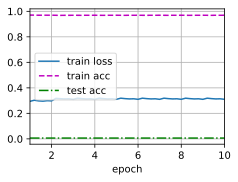

In [20]:
lr, num_epochs = 0.9, 10
train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

In [6]:
t = torch.Tensor(3,4)
t.cuda(0)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]], device='cuda:0')